In [1]:
import pandas as pd 
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt

1/ diviser mon dataset (train_test_split)
2/ pour trouver les meilleurs hyper paramètres: gridsearch (cross validation, définir un nombre de split)
3/ matrix pour visualiser la performance de mon algo 

In [2]:
df_house = pd.read_csv('kc_house_data.csv')
df_house.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:

# fig = px.histogram(df_house, x="log_price")
# fig.show()

## Nuage de points

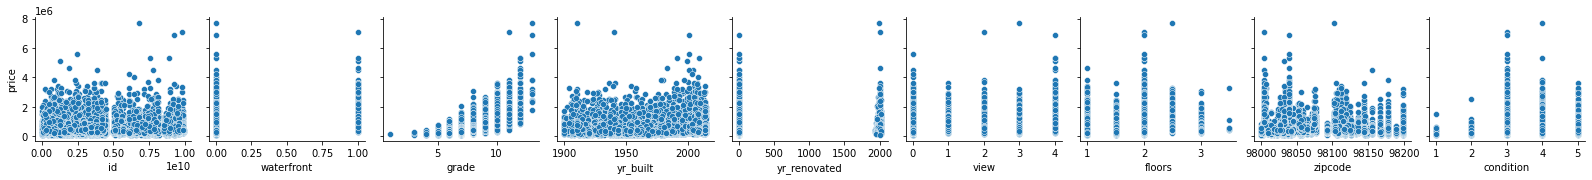

In [4]:
sns.pairplot(df_house, x_vars = [ 'id','waterfront', 'grade','yr_built', 'yr_renovated', 'view', 'floors', 'zipcode','condition'] , y_vars=['price'])

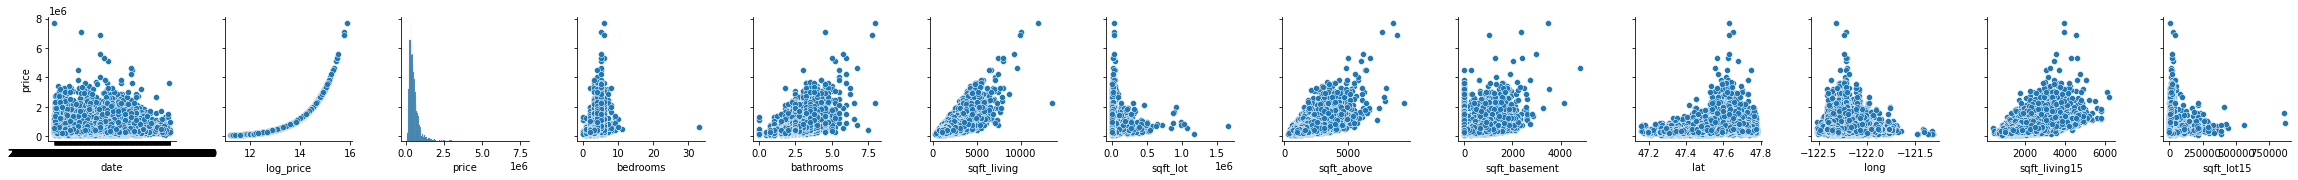

In [5]:
df_house['log_price'] = np.log1p(df_house['price'])
sns.pairplot(df_house, x_vars = ['date','log_price', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] , y_vars=['price'])

## cleaning

In [6]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309987
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195616
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100718
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311331
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142168


In [7]:
max_bedrooms = df_house.loc[df_house.bedrooms == df_house.bedrooms.max()]
max_bedrooms.id

15870    2402100895
Name: id, dtype: int64

In [8]:
# df_house = df_house.drop(labels =15870, axis=0)
df_house['date'] = pd.to_datetime(df_house['date'])

In [10]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309987
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195616
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100718
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311331
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793862
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899222
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904461
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899222


In [11]:
df_house['mounth']= df_house['date'].dt.strftime('%m')
df = df_house.sort_values(by ='mounth')


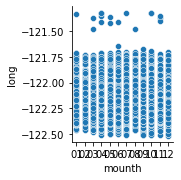

In [12]:
sns.pairplot(df, x_vars = ['mounth'] , y_vars=['long'])

In [13]:
from sklearn.preprocessing import PolynomialFeatures


In [14]:
y = df_house.price
X = df_house.drop(['price','log_price','id','date'], axis=1)
X_poly = PolynomialFeatures(2).fit_transform(X)



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2) 


In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
 
model = LinearRegression()

model.get_params()
model.fit(X_train, y_train)
model.score(X_valid, y_valid)


0.8327014639363226